In [8]:
import pandas as pd

In [9]:
data=pd.read_csv('/content/emails.csv')

In [10]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [12]:
data.shape

(5728, 2)

In [13]:
data['spam'].value_counts()

,count
spam,
0,4360
1,1368


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

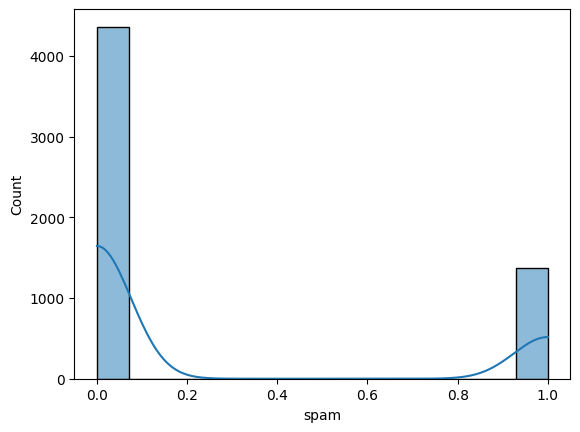

In [15]:
sns.histplot(data['spam'],kde=True)
plt.show()

In [16]:
from tensorflow.keras.layers import Dense

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
model=Sequential([
    Dense(1,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
from sklearn.model_selection import train_test_split as t

In [21]:
x=data

In [22]:
x.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [23]:
x=data['text']
y=data['spam']

In [35]:
x_train,x_test,y_train,y_test=t(x,y,test_size=0.2,random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 36996)
(1146, 36996)
(4582,)
(1146,)


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
x_train

,text
4860,Subject: re : request for payroll reclassifica...
1520,Subject: re : pending approval for ibuyit requ...
2083,Subject: congratulations ! hi vince : i just...
527,Subject: secretly record all internet activity...
3113,"Subject: interviews scheduled for monday , nov..."
...,...
3772,Subject: john sherriff ' s copper position te...
5191,Subject: the national forum on corporate finan...
5226,"Subject: re : my first draft quentin , i for..."
5390,Subject: why johan dahl and the mri energy sta...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vector=TfidfVectorizer(stop_words='english')

In [30]:
x=vector.fit_transform(x)

In [34]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 508419 stored elements and shape (5728, 36996)>
  Coords	Values
  (0, 32145)	0.01781272601181811
  (0, 23219)	0.12256415839423043
  (0, 18705)	0.1432830450797234
  (0, 9986)	0.07425233664021534
  (0, 17562)	0.09302659600058759
  (0, 21006)	0.11259587569184905
  (0, 27817)	0.06817457798935368
  (0, 16546)	0.07848771947213565
  (0, 27941)	0.11391594069511475
  (0, 9223)	0.16756208708238118
  (0, 21520)	0.11577281792556753
  (0, 32408)	0.12371376538846193
  (0, 18103)	0.04504514237999522
  (0, 18751)	0.13491099920740895
  (0, 15964)	0.1033087647302782
  (0, 7986)	0.11461456851250225
  (0, 20818)	0.265157481584021
  (0, 32126)	0.12371376538846193
  (0, 31776)	0.12256415839423043
  (0, 24679)	0.09199667182622404
  (0, 35805)	0.13645440111292698
  (0, 21296)	0.09831341956555792
  (0, 32839)	0.09815099793568317
  (0, 12539)	0.09281579204902306
  (0, 26937)	0.20113998716066434
  :	:
  (5727, 24659)	0.10273386204392845
  (5727, 21490

In [41]:
model=Sequential([
    Dense(units=1,activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.fit(x_train,y_train,epochs=1,batch_size=32,validation_split=0.33)

96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 1.0000 - loss: 0.0886 - val_accuracy: 0.9379 - val_loss: 0.1466


In [51]:
y_pred=model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step


In [61]:
y_pred

array([[1.7999682e-05],
       [6.3845534e-03],
       [5.4295528e-05],
       ...,
       [7.1504349e-01],
       [1.0792043e-04],
       [1.7821065e-03]], dtype=float32)

In [62]:
y_pred=(y_pred>=0.5).astype(int)

In [63]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [57]:
from sklearn.metrics import accuracy_score

In [64]:
score=accuracy_score(y_test,y_pred)

In [66]:
score

0.9258289703315882

96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - accuracy: 1.0000 - loss: 0.0743 - val_accuracy: 0.9418 - val_loss: 0.1411


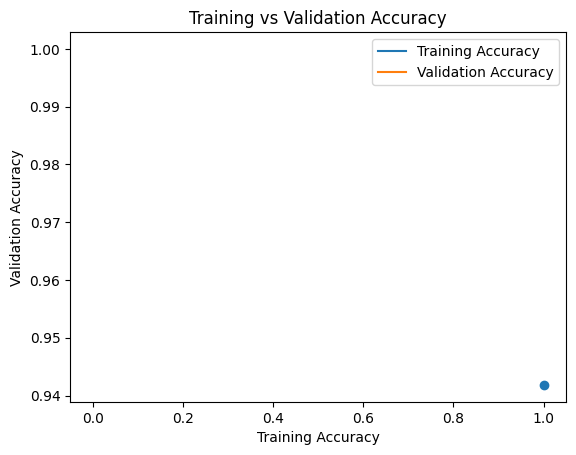

In [92]:
# Assuming 'history' is the variable returned by model.fit()
# If not, you'll need to assign the output of model.fit() to 'history'
history=model.fit(x_train,y_train,epochs=1,batch_size=32,validation_split=0.33)
plt.scatter(history.history['accuracy'], history.history['val_accuracy'])
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()